# Start fresh - merge the loom files

Man I hate to do it over and over again.

Hope this time the data looks better!

In [2]:
import scvelo as scv
import loompy
import scanpy
import igraph
import phate
import glob, os
import pandas as pd
import os
import re
import subprocess
from collections import Counter
import numpy as np

#ofile = "Pavan_healthy_merged_downsampled_1000.h5ad"
analyzed = "Hongze_healthy_2020_10_downsampled_1000.h5ad"
overclustered = "Hongze_healthy_2020_10_downsampled_1000_2D_overclustered.h5ad"


In [2]:
adata = scv.read(analyzed)

In [3]:
scanpy.pp.filter_genes(adata, min_counts=1 )
scv.pp.log1p(adata)
scanpy.pp.highly_variable_genes(adata, n_top_genes=3000)
print ( Counter( adata.var['highly_variable']))
adata

Counter({False: 18269, True: 3000})


AnnData object with n_obs × n_vars = 25067 × 21269
    obs: 'TotalUMIs', 'sname', 'n_counts'
    var: 'Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain', 'FullName', 'GeneType', 'HgncID', 'IsTF', 'Location', 'LocationSortable', 'LocusGroup', 'LocusType', 'MgdID', 'MirBaseID', 'OmimID', 'PubmedID', 'RefseqID', 'RgdID', 'UcscID', 'UniprotID', 'VegaID', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [4]:
#scv.pp.moments(adata, n_pcs=10, n_neighbors=30)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scanpy.tl.umap(adata,n_components=2, min_dist =0.55)
scanpy.tl.louvain(adata)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:24) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:30) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
scv.tl.recover_dynamics(adata, n_top_genes=200)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)
scv.tl.velocity_embedding(adata,basis='umap')

recovering dynamics
    finished (0:23:00) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:13) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:18) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:12) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


In [6]:
scanpy.external.tl.phate(adata, n_components=2, verbose =2)
scv.tl.velocity_embedding(adata,basis='phate')

Calculating PHATE...
  Running PHATE on 25067 observations and 21269 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 15.97 seconds.
    Calculating KNN search...
    Calculated KNN search in 72.82 seconds.
    Calculating affinities...
    Calculated affinities in 123.89 seconds.
  Calculated graph and diffusion operator in 213.35 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 15.88 seconds.
    Calculating KMeans...
    Calculated KMeans in 41.19 seconds.
  Calculated landmark operator in 59.25 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 2.82 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.51 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.46 seconds.
Calculated PHATE in 281.41 seconds.
computing velocity embedding
    finished (0:00:13) --> added
    'velocity_phate', embedded velocity

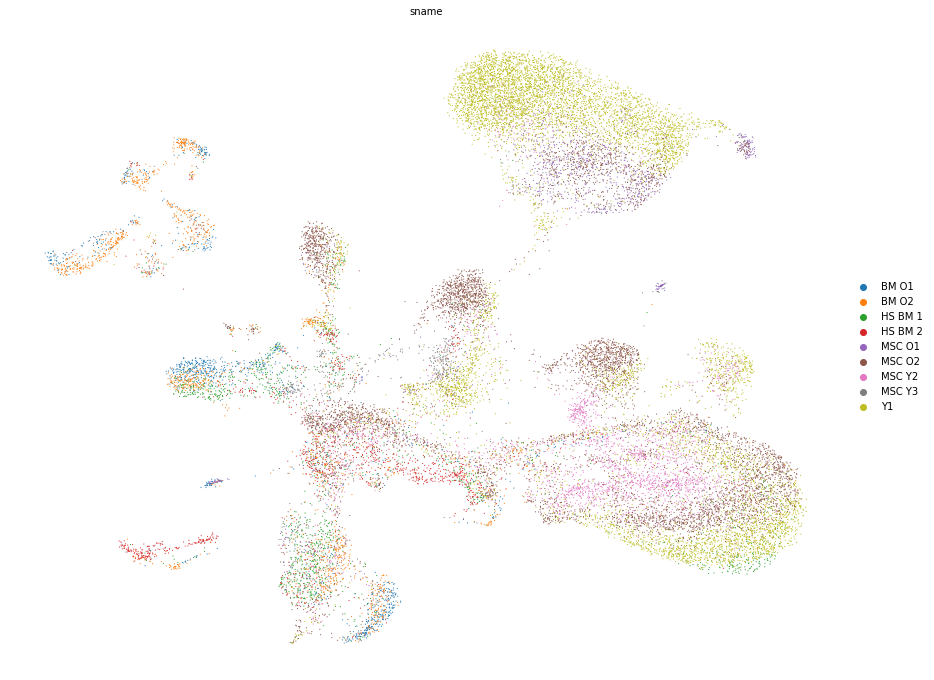

In [7]:
scanpy.tl.louvain( adata, resolution =1.0 )
scv.pl.scatter(adata, color='sname', figsize =(15,12), legend_loc='right margin')

In [2]:
try:
    adata
except NameError:
    adata = scv.read(overclustered)

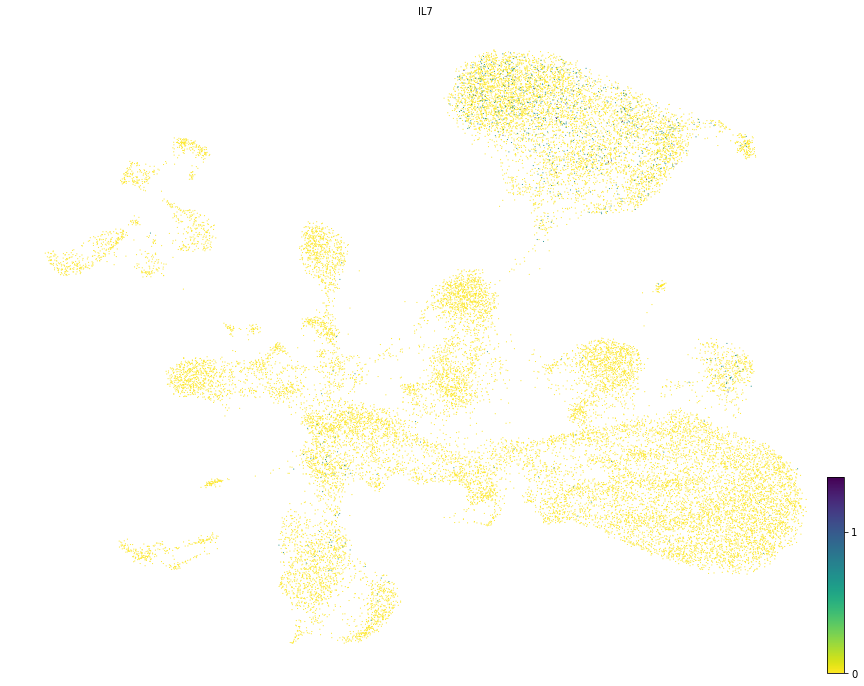

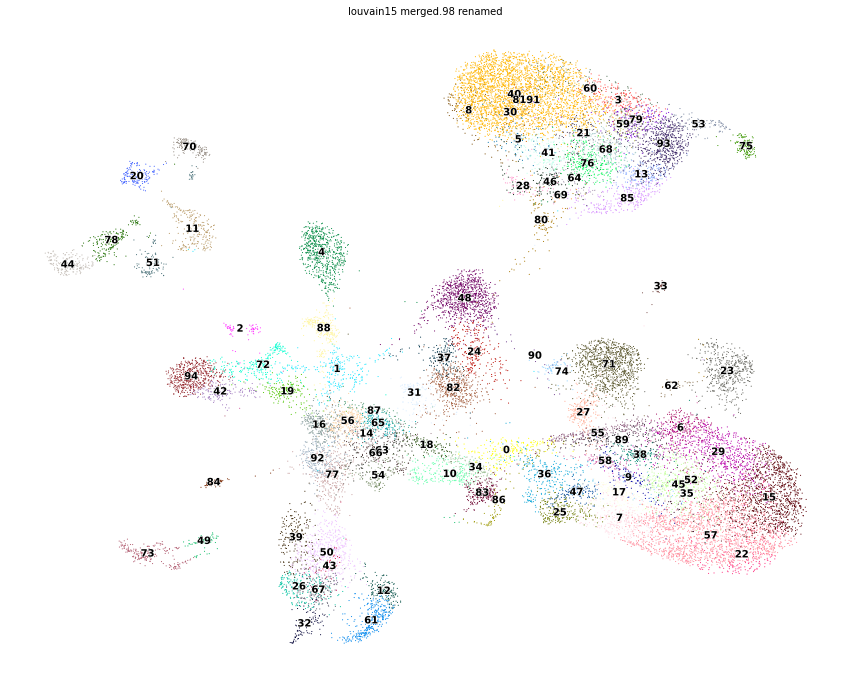

In [7]:
scv.pl.scatter(adata, color='IL7', figsize =(15,12), color_map='viridis_r')
scv.pl.scatter(adata, color=['louvain15_merged.98_renamed'], figsize =(15,12))

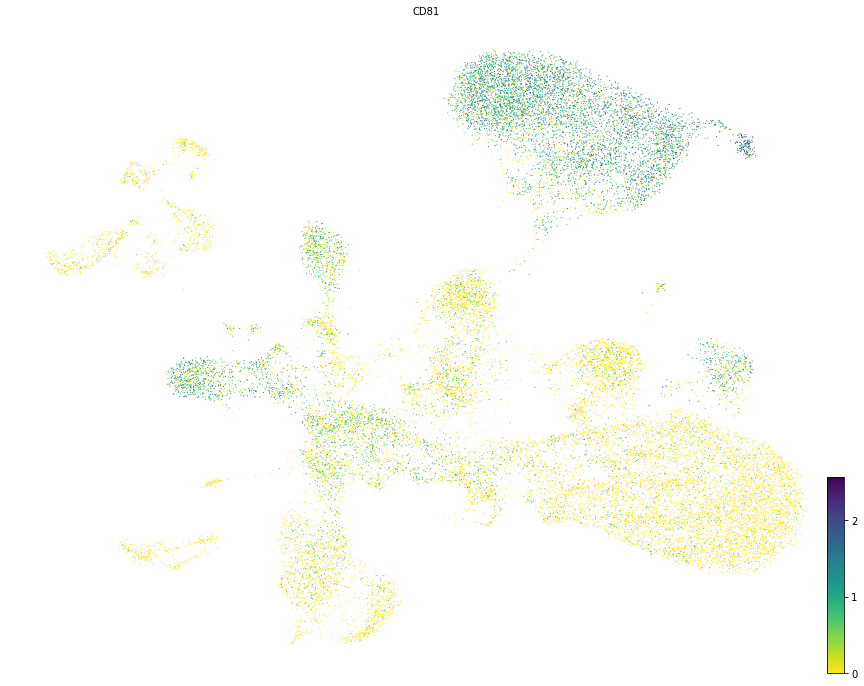

In [9]:
scv.pl.scatter(adata, color='CD81', figsize =(15,12), color_map='viridis_r')

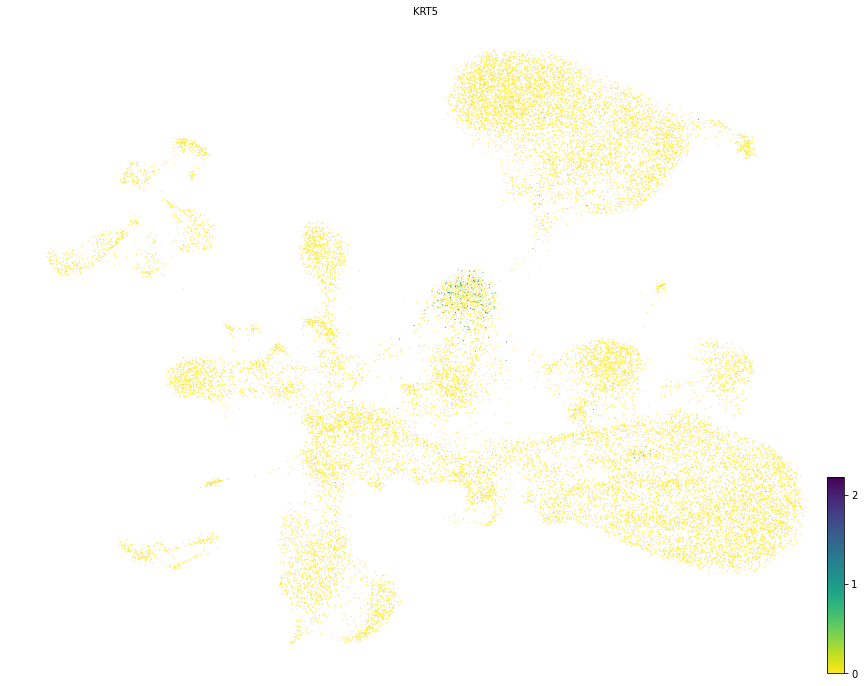

In [10]:
scv.pl.scatter(adata, color='KRT5', figsize =(15,12), color_map='viridis_r')

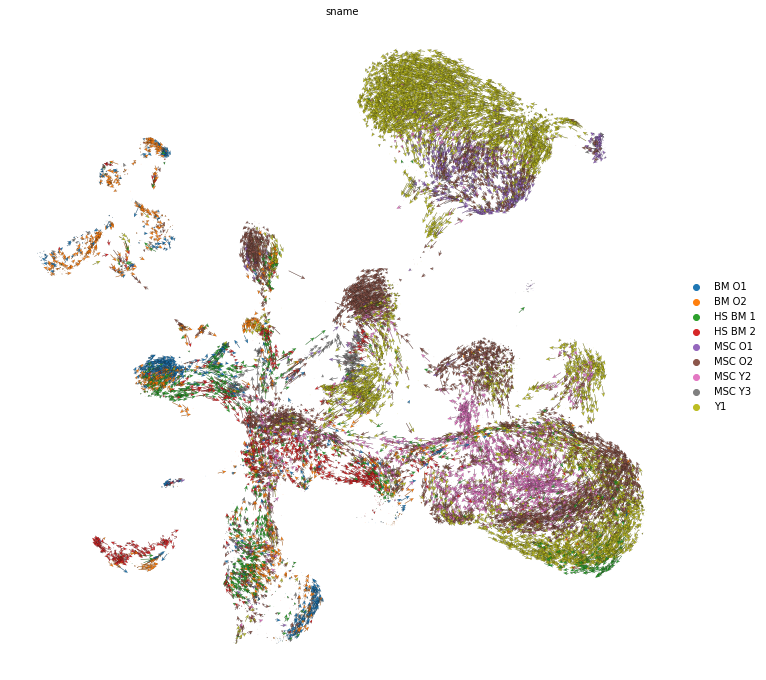

In [11]:
scv.pl.velocity_embedding(adata,density=0.6,figsize =(12,12), arrow_length=10, color='sname', legend_loc='right margin' )

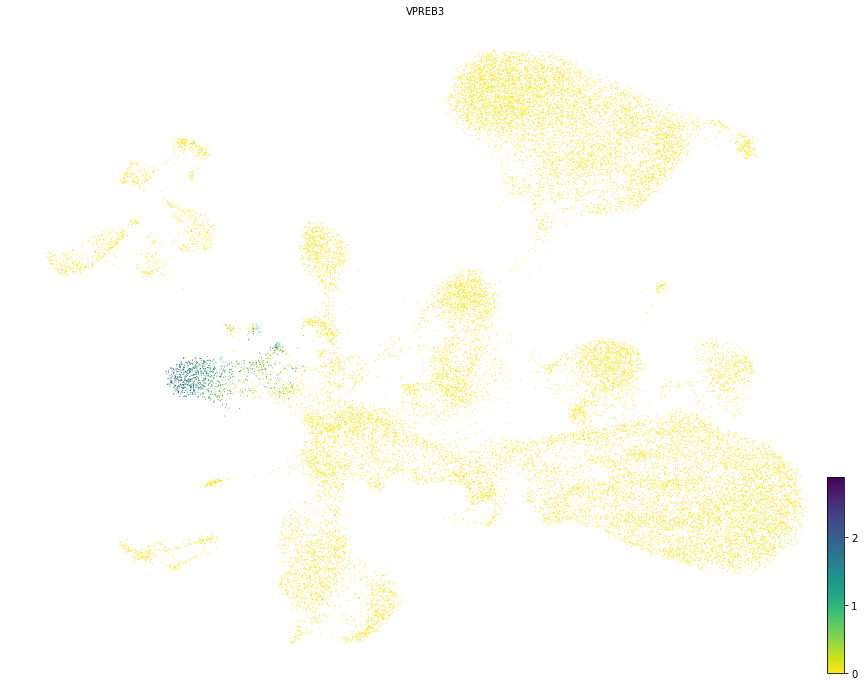

In [12]:
scv.pl.scatter(adata, color='VPREB3', figsize =(15,12), color_map='viridis_r')

Interesting links to B and T cell development:
https://www.sciencedirect.com/science/article/pii/S1074761319304042?via%3Dihub
https://en.wikipedia.org/wiki/V(D)J_recombination

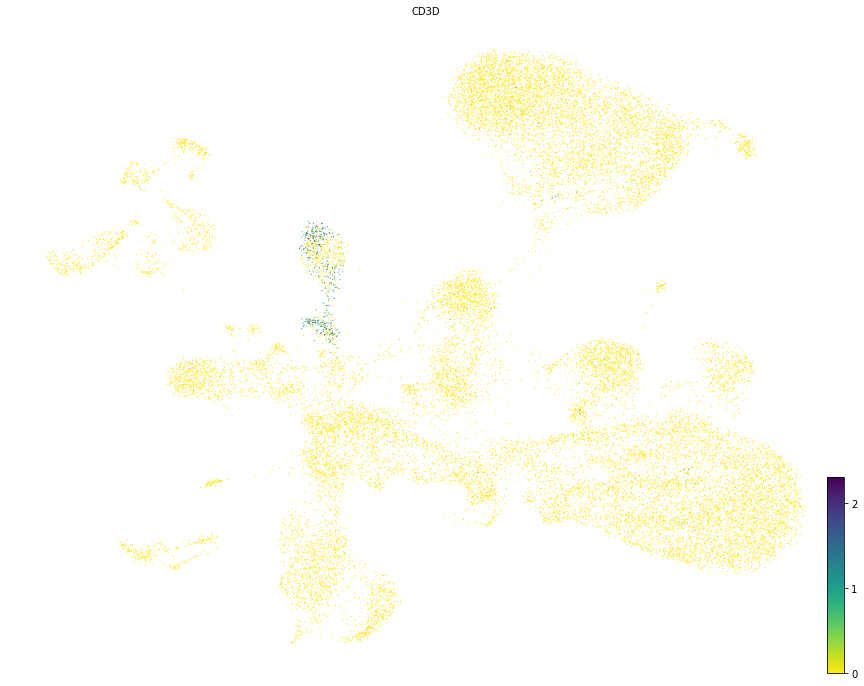

In [13]:
# genes early T cells: CD2, CD3G, CD3D - yes I think that is enough!
# They all mark the same ara! And that is where the DJ recombined proB cell go to!
# THAT IS EPIC!
scv.pl.scatter(adata, color='CD3D', figsize =(15,12), color_map='viridis_r')

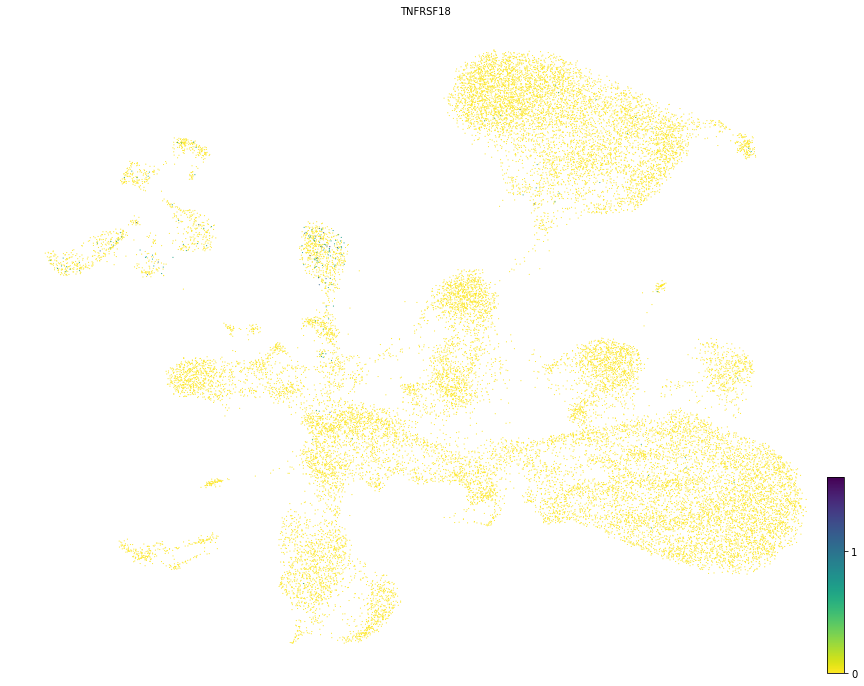

In [14]:
scv.pl.scatter(adata, color='TNFRSF18', figsize =(15,12), color_map='viridis_r')

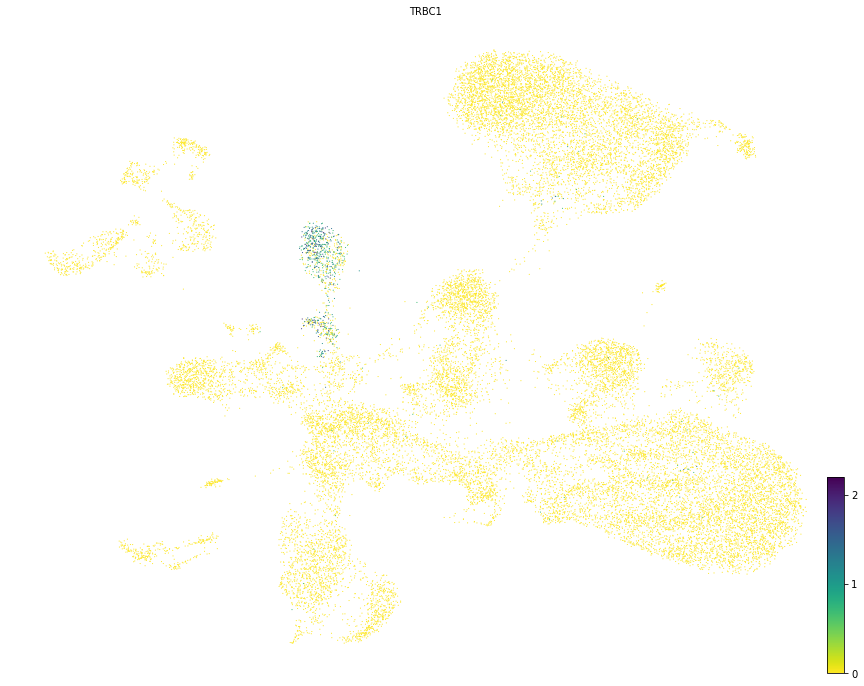

In [15]:
scv.pl.scatter(adata, color='TRBC1', figsize =(15,12), color_map='viridis_r')

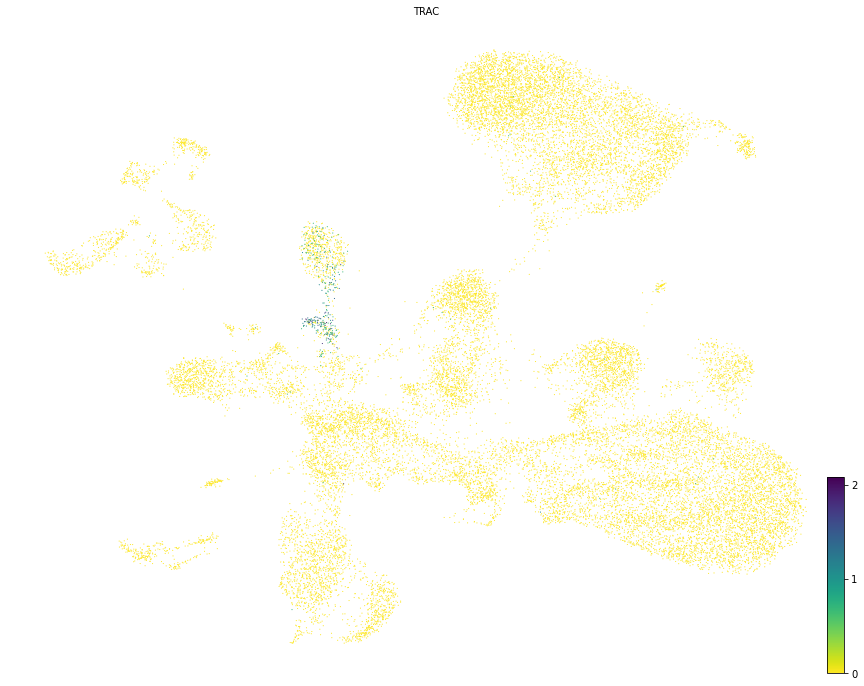

In [16]:
scv.pl.scatter(adata, color='TRAC', figsize =(15,12), color_map='viridis_r')

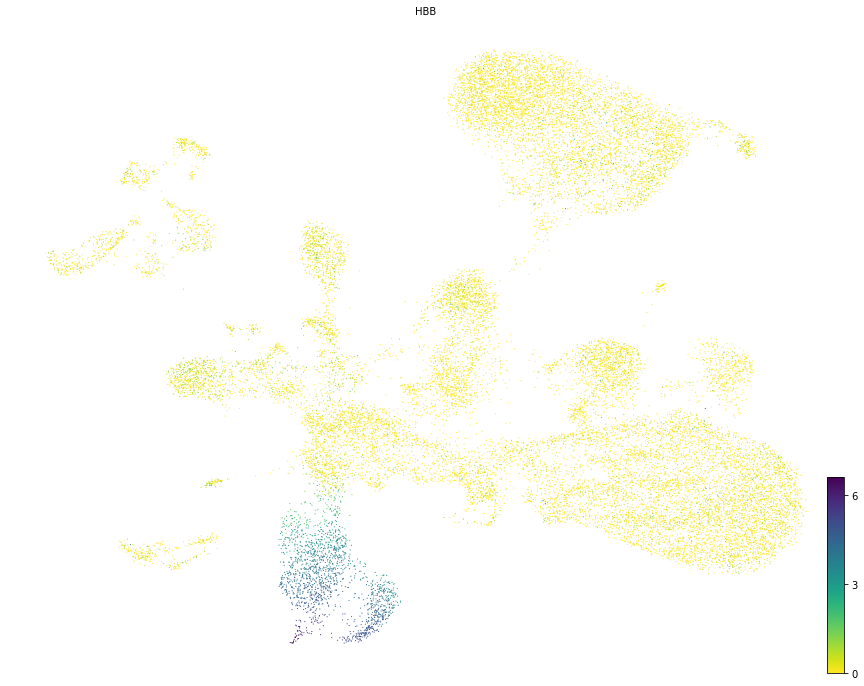

In [17]:
scv.pl.scatter(adata, color='HBB', figsize =(15,12), color_map='viridis_r')

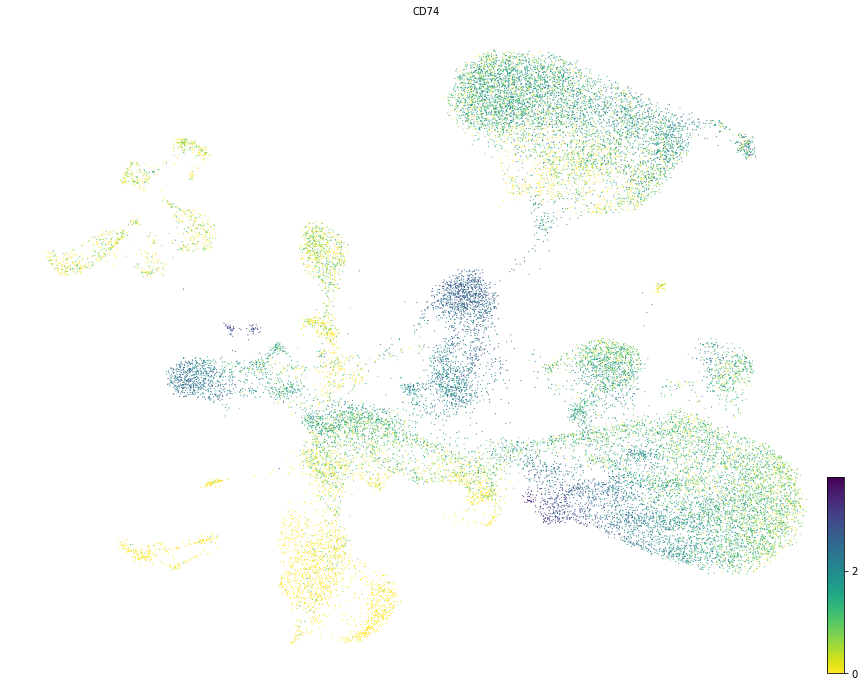

In [18]:
scv.pl.scatter(adata, color='CD74', figsize =(15,12), color_map='viridis_r')

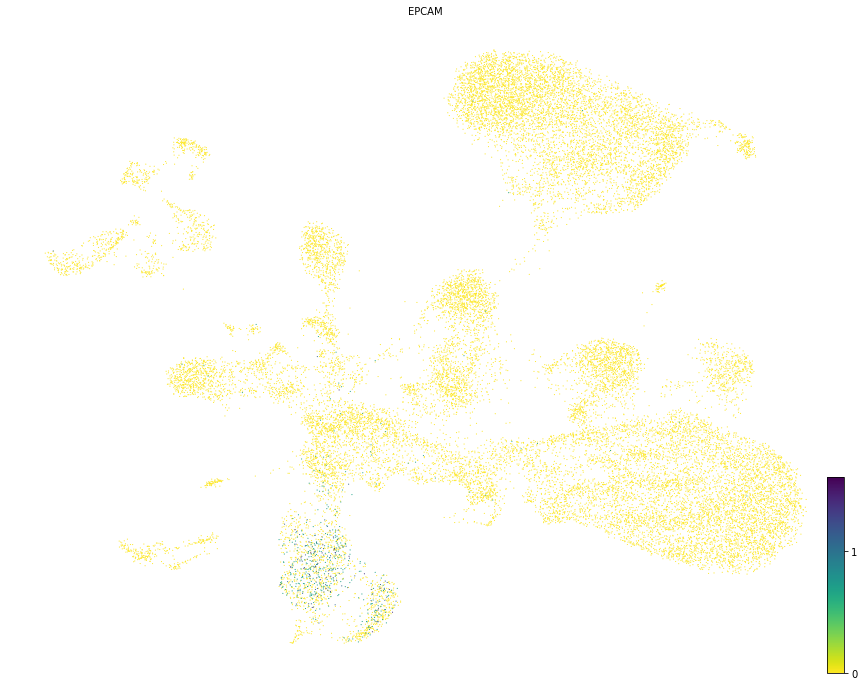

In [19]:
scv.pl.scatter(adata, color='EPCAM', figsize =(15,12), color_map='viridis_r')

In [20]:
#scanpy.tl.louvain( adata, resolution =1 )
#scv.pl.scatter(adata, color='louvain', figsize =(15,12))

In [21]:
def toVR_SelectionTable (adata, values_key, drc_name ):
    df = pd.DataFrame ( { 
   #     'cells': adata.obs.index, 
        'cols': [ adata.uns[f"{values_key}_colors"][int(x)] for x in adata.obs[values_key].values], 
        'drc': [ drc_name for x in adata.obs.index], 
        'groupID': adata.obs[values_key]
    } )
    df = df.sort_values(by=['groupID'])
    df.to_csv(f"Selection_{values_key}.txt", sep="\t", header=False)
    return (f"saved as Selection_{values_key}.txt")

In [22]:
#toVR_SelectionTable( adata, 'louvain', 'umap')


In [23]:
scanpy.tl.louvain( adata, resolution =15,key_added='velocity_clusters15')

#scv.pl.velocity_embedding(adata,density=15,figsize =(15,12), arrow_length=5,color='velocity_clusters15' )
#scv.pl.scatter(adata, color='velocity_clusters15', figsize =(15,12), legend_loc='right margin')

In [24]:
def grouped_obs_mean(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(X.mean(axis=0, dtype=np.float64))
    return out



def mergeClosest( adata, group = 'louvain11_merged.9', cut = 0.9 ):
    ### create mean expression per group, correlate all mean groups and scan all groups for corr > cut
    ### the first group with others cor > cut will merge with the best correlating groups available
    ### only one group will be merged at a time
    ### run as
    ### while ( mergeClosest( adata ) ):
    ###		print ( "-", end="")
    print (str(len(Counter(adata.obs[group])))+ " -", end=" ")
    df = grouped_obs_mean( adata, group )
    df = df.corr()
    for i in range(0,df.shape[0]):
        df.at[df.columns[i],df.columns[i]] = 0
    #print("processing groups")
    #print (df)
    for i in range( 0, len(df.columns)):
        i = df.columns[i]
        col = df[i]
        #print ( "max value="+ str( max( col )) )
        if max( col ) >= cut:
            gr = np.array(adata.obs[group])
            m = [df.columns[a] for a in range(0, len(col)) if col[a] == max(col) ]
            m = m[0]
            #print ("max value="+str(max[col])+ " merge " + str(m) + " to "+ str(i)+".")
            for x in range(0,len(adata.obs[group])):
                    if str(gr[x]) == i:
                        #print ( "changed" + str(x)+ " change " + gr[x]  + " to "+ str(m))
                        gr[x] = m
            #type(gr)
            #print("finished")
            adata.obs[group] = gr
            return True
    print ( "no cluster did match to any other cluster with cor > "+ str(cut) )
    return False


def reIDgroup( adata, group ):
    gr = np.array(adata.obs[group])
    n = 0
    for i in set(adata.obs[group]):
        for x in range(0,len(adata.obs[group])):
            if adata.obs[group][x] == i:
                gr[x] = n
        n = n +1
    adata.obs[group+'_renamed'] = gr


In [25]:
adata.obs['louvain15_merged.92'] = adata.obs['velocity_clusters15']
while ( mergeClosest( adata, group = 'louvain15_merged.92', cut=0.92 ) ):
    print ( "w", end=" - ")

reIDgroup(adata, group='louvain15_merged.92' )

135 - w - 134 - w - 133 - w - 132 - w - 131 - w - 130 - w - 129 - w - 128 - w - 127 - w - 126 - w - 125 - w - 124 - w - 123 - w - 122 - w - 121 - w - 120 - w - 119 - w - 118 - w - 117 - w - 116 - w - 115 - w - 114 - w - 113 - w - 112 - w - 111 - w - 110 - w - 109 - w - 108 - w - 107 - w - 106 - w - 105 - w - 104 - w - 103 - w - 102 - w - 101 - w - 100 - w - 99 - w - 98 - w - 97 - w - 96 - w - 95 - w - 94 - w - 93 - w - 92 - w - 91 - w - 90 - w - 89 - w - 88 - w - 87 - w - 86 - w - 85 - w - 84 - w - 83 - w - 82 - w - 81 - w - 80 - w - 79 - w - 78 - w - 77 - w - 76 - w - 75 - w - 74 - w - 73 - w - 72 - w - 71 - w - 70 - w - 69 - w - 68 - w - 67 - w - 66 - w - 65 - w - 64 - w - 63 - w - 62 - w - 61 - w - 60 - w - 59 - w - 58 - w - 57 - w - 56 - w - 55 - w - 54 - w - 53 - w - 52 - w - 51 - w - 50 - w - 49 - w - 48 - w - 47 - w - 46 - w - 45 - w - 44 - w - 43 - w - 42 - w - 41 - w - 40 - w - 39 - w - 38 - w - 37 - w - 36 - w - 35 - w - 34 - w - 33 - no cluster did match to any other cluster

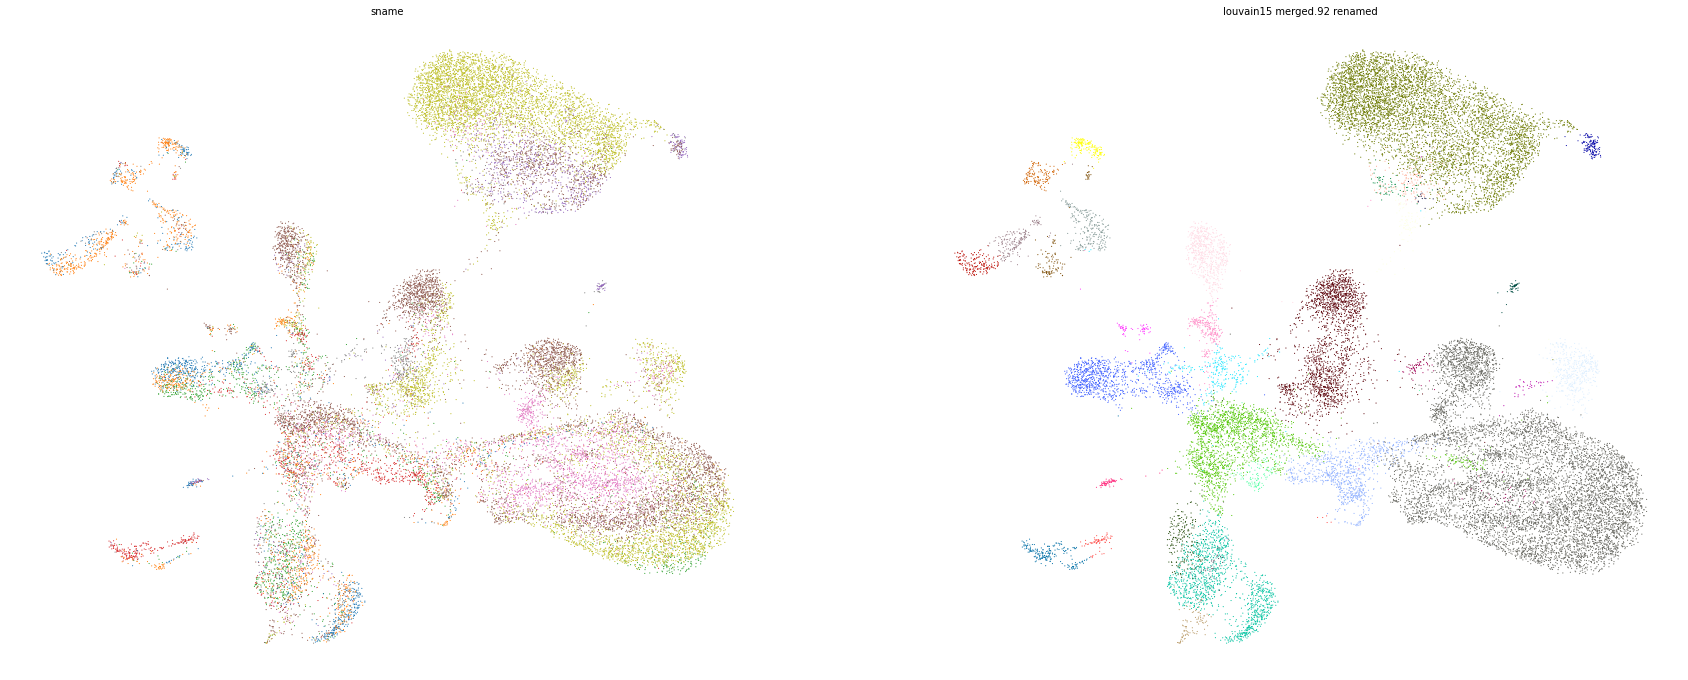

In [26]:
scv.pl.scatter(adata, color=['sname','louvain15_merged.92_renamed'], figsize =(15,12))

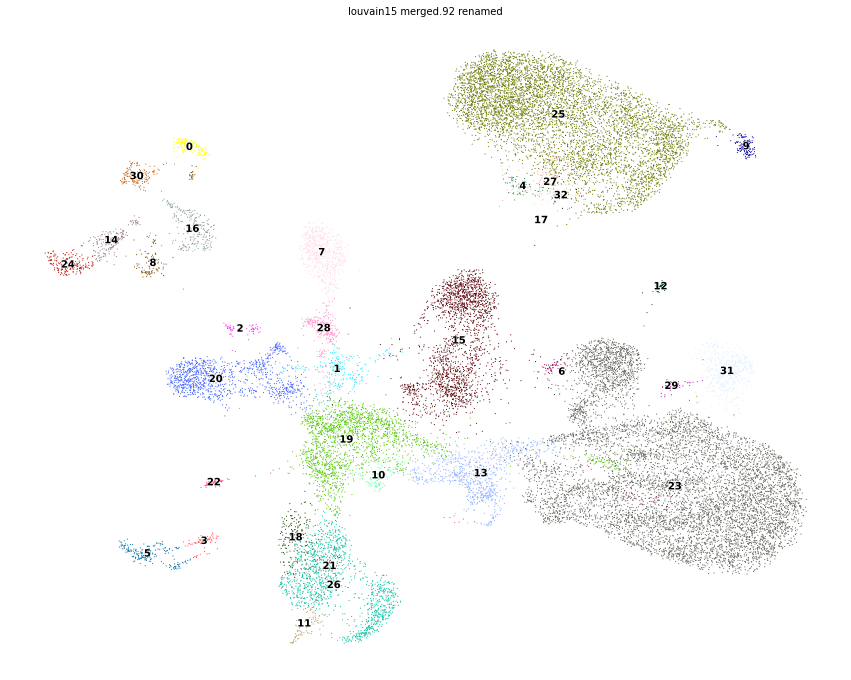

In [27]:
scv.pl.scatter(adata, color=['louvain15_merged.92_renamed'], figsize =(15,12))

In [28]:
Counter( adata.obs['louvain15_merged.92_renamed'].sort_values())

Counter({'0': 159,
         '1': 254,
         '2': 67,
         '3': 74,
         '4': 65,
         '5': 207,
         '6': 87,
         '7': 638,
         '8': 113,
         '9': 140,
         '10': 130,
         '11': 90,
         '12': 51,
         '13': 896,
         '14': 184,
         '15': 1985,
         '16': 223,
         '17': 127,
         '18': 200,
         '19': 1905,
         '20': 1089,
         '21': 44,
         '22': 75,
         '23': 7696,
         '24': 172,
         '25': 6029,
         '26': 1303,
         '27': 136,
         '28': 264,
         '29': 35,
         '30': 142,
         '31': 467,
         '32': 20})

In [29]:
adata.obs['louvain15_merged.95'] = adata.obs['velocity_clusters15']
while ( mergeClosest( adata, group = 'louvain15_merged.95', cut=0.95 ) ):
    print ( "w", end=" - ")

reIDgroup(adata, group='louvain15_merged.95' )

135 - w - 134 - w - 133 - w - 132 - w - 131 - w - 130 - w - 129 - w - 128 - w - 127 - w - 126 - w - 125 - w - 124 - w - 123 - w - 122 - w - 121 - w - 120 - w - 119 - w - 118 - w - 117 - w - 116 - w - 115 - w - 114 - w - 113 - w - 112 - w - 111 - w - 110 - w - 109 - w - 108 - w - 107 - w - 106 - w - 105 - w - 104 - w - 103 - w - 102 - w - 101 - w - 100 - w - 99 - w - 98 - w - 97 - w - 96 - w - 95 - w - 94 - w - 93 - w - 92 - w - 91 - w - 90 - w - 89 - w - 88 - w - 87 - w - 86 - w - 85 - w - 84 - w - 83 - w - 82 - w - 81 - w - 80 - w - 79 - w - 78 - w - 77 - w - 76 - w - 75 - w - 74 - w - 73 - w - 72 - w - 71 - w - 70 - w - 69 - w - 68 - w - 67 - w - 66 - w - 65 - w - 64 - w - 63 - w - 62 - w - 61 - w - 60 - w - 59 - w - 58 - w - 57 - w - 56 - w - 55 - w - 54 - w - 53 - w - 52 - w - 51 - w - 50 - w - 49 - w - 48 - w - 47 - no cluster did match to any other cluster with cor > 0.95


In [30]:
adata

AnnData object with n_obs × n_vars = 25067 × 21269
    obs: 'TotalUMIs', 'sname', 'n_counts', 'louvain', 'velocity_self_transition', 'velocity_clusters15', 'louvain15_merged.92', 'louvain15_merged.92_renamed', 'louvain15_merged.95', 'louvain15_merged.95_renamed'
    var: 'Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain', 'FullName', 'GeneType', 'HgncID', 'IsTF', 'Location', 'LocationSortable', 'LocusGroup', 'LocusType', 'MgdID', 'MirBaseID', 'OmimID', 'PubmedID', 'RefseqID', 'RgdID', 'UcscID', 'UniprotID', 'VegaID', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'louvain', 'recover_dynamics

In [31]:
adata.obs['louvain15_merged.98'] = adata.obs['velocity_clusters15']
while ( mergeClosest( adata, group = 'louvain15_merged.98', cut=0.98 ) ):
    print ( "w", end=" - ")

reIDgroup(adata, group='louvain15_merged.98' )

135 - w - 134 - w - 133 - w - 132 - w - 131 - w - 130 - w - 129 - w - 128 - w - 127 - w - 126 - w - 125 - w - 124 - w - 123 - w - 122 - w - 121 - w - 120 - w - 119 - w - 118 - w - 117 - w - 116 - w - 115 - w - 114 - w - 113 - w - 112 - w - 111 - w - 110 - w - 109 - w - 108 - w - 107 - w - 106 - w - 105 - w - 104 - w - 103 - w - 102 - w - 101 - w - 100 - w - 99 - w - 98 - w - 97 - w - 96 - w - 95 - no cluster did match to any other cluster with cor > 0.98


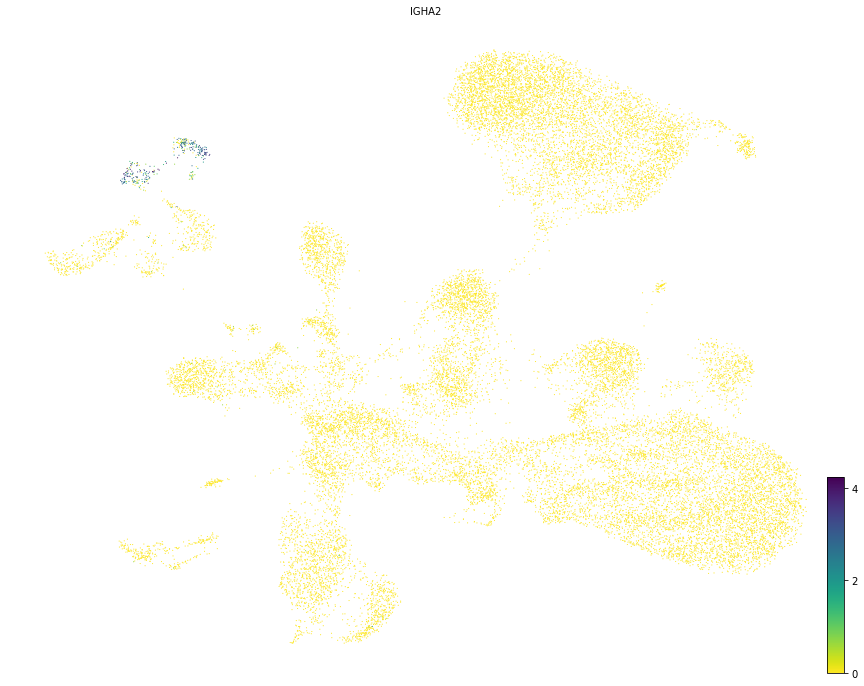

In [32]:
scv.pl.scatter(adata, color='IGHA2', figsize =(15,12), color_map='viridis_r')

In [33]:
if os.path.exists(overclustered):
    os.remove(overclustered)
adata.write(overclustered)

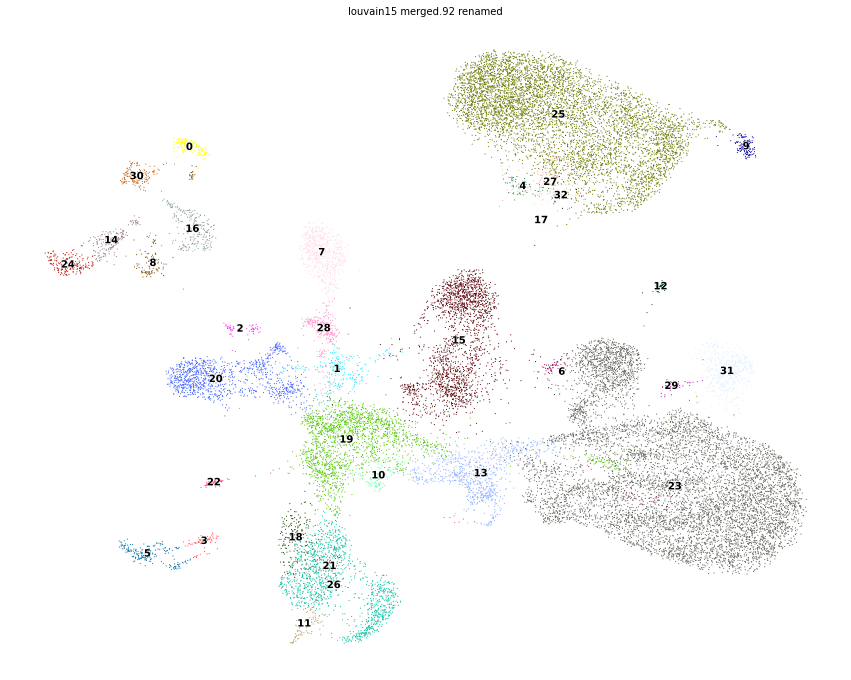

In [34]:
scv.pl.scatter(adata, color=['louvain15_merged.92_renamed'], figsize =(15,12))

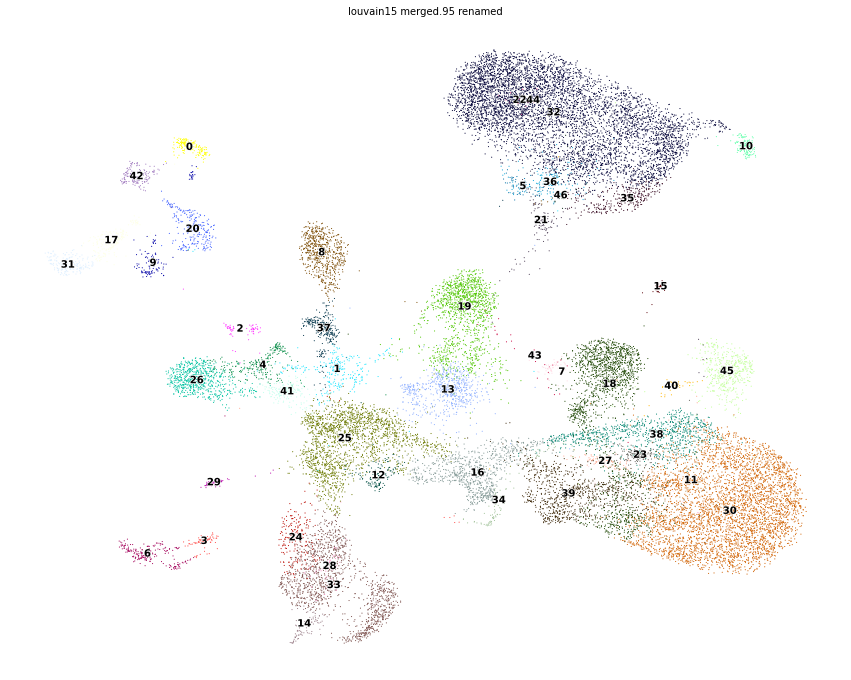

In [35]:
scv.pl.scatter(adata, color=['louvain15_merged.95_renamed'], figsize =(15,12))

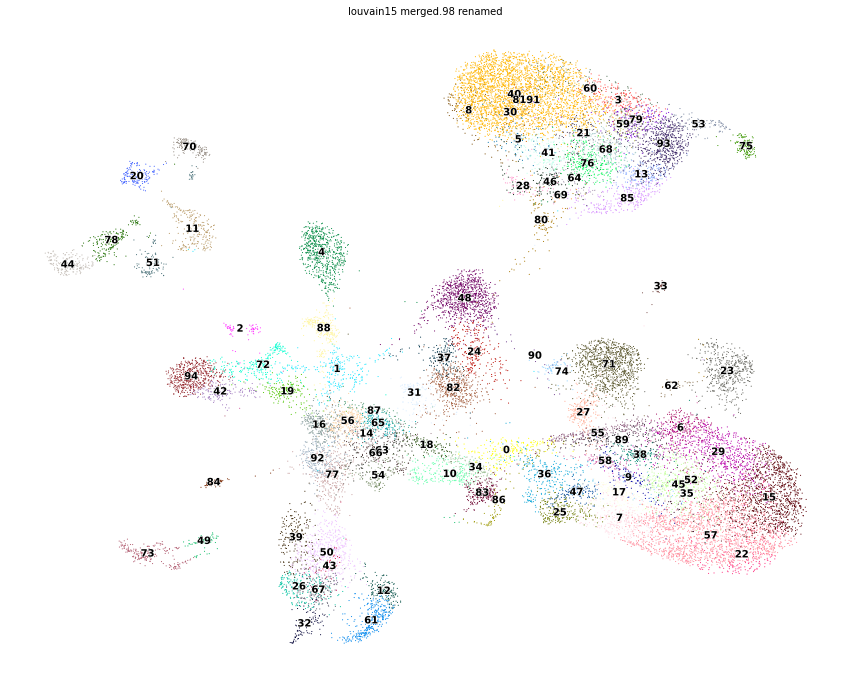

In [36]:
scv.pl.scatter(adata, color=['louvain15_merged.98_renamed'], figsize =(15,12))

# These clusters are not OK

The clusters in 3D starting with louvain lcuistersin resolution 11 and merging down with 0.95 look way better.
Instead of using the 'old' clustering I will try whether using the same settings does reproduce the clsutering here. It really should!

In [37]:
adata = scv.read(overclustered)

In [38]:
scanpy.tl.louvain( adata, resolution = 11.0,key_added='louvain11' )


In [39]:
adata.obs['louvain11_merged.95'] = adata.obs['louvain11']
while ( mergeClosest( adata, group = 'louvain11_merged.95', cut = 0.95 ) ):
    print ( "w", end=" - ")

reIDgroup(adata, group='louvain11_merged.95' )

103 - w - 102 - w - 101 - w - 100 - w - 99 - w - 98 - w - 97 - w - 96 - w - 95 - w - 94 - w - 93 - w - 92 - w - 91 - w - 90 - w - 89 - w - 88 - w - 87 - w - 86 - w - 85 - w - 84 - w - 83 - w - 82 - w - 81 - w - 80 - w - 79 - w - 78 - w - 77 - w - 76 - w - 75 - w - 74 - w - 73 - w - 72 - w - 71 - w - 70 - w - 69 - w - 68 - w - 67 - w - 66 - w - 65 - w - 64 - w - 63 - w - 62 - w - 61 - w - 60 - w - 59 - w - 58 - w - 57 - w - 56 - w - 55 - w - 54 - w - 53 - w - 52 - w - 51 - w - 50 - w - 49 - w - 48 - w - 47 - w - 46 - w - 45 - w - 44 - w - 43 - w - 42 - no cluster did match to any other cluster with cor > 0.95


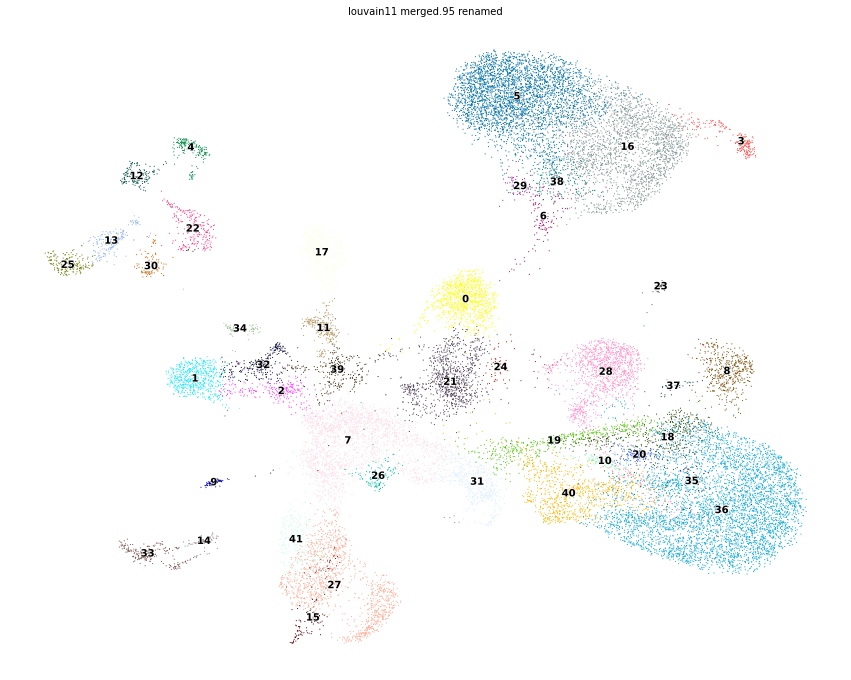

In [40]:
scv.pl.scatter(adata, color=['louvain11_merged.95_renamed'], figsize =(15,12))

# YES!!!
This method is totally reproducable and it does not make a differnece if one starts with 2D or 3D data. Apart from the data looking much better in 3D :-D

In [41]:
if os.path.exists(overclustered):
    os.remove(overclustered)
adata.write(overclustered)

In [3]:
adata = scv.read(overclustered)
scanpy.tl.rank_genes_groups(
    adata, 
    groupby   = 'louvain11_merged.95_renamed',
    key_added = 'louvain11_merged.95_renamed_DE_results',
    method    = 'wilcoxon',
)
adata

AnnData object with n_obs × n_vars = 25067 × 21269
    obs: 'TotalUMIs', 'sname', 'n_counts', 'louvain', 'velocity_self_transition', 'velocity_clusters15', 'louvain15_merged.92', 'louvain15_merged.92_renamed', 'louvain15_merged.95', 'louvain15_merged.95_renamed', 'louvain15_merged.98', 'louvain15_merged.98_renamed', 'louvain11', 'louvain11_merged.95', 'louvain11_merged.95_renamed'
    var: 'Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain', 'FullName', 'GeneType', 'HgncID', 'IsTF', 'Location', 'LocationSortable', 'LocusGroup', 'LocusType', 'MgdID', 'MirBaseID', 'OmimID', 'PubmedID', 'RefseqID', 'RgdID', 'UcscID', 'UniprotID', 'VegaID', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_vari

In [6]:
opath = f"diff_exp_louvain_tables_louvain11_merged.95_renamed"
if not os.path.exists(opath):
    os.mkdir(opath)

columns = ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']
diff_results = adata.uns["louvain11_merged.95_renamed_DE_results"]

for i in range(42):
    table = {}
    for j in columns:
        table[j] = pd.DataFrame(diff_results[j])[str(i)]
    table = pd.DataFrame(table).to_csv(f"{opath}/cluster_{i}.csv")



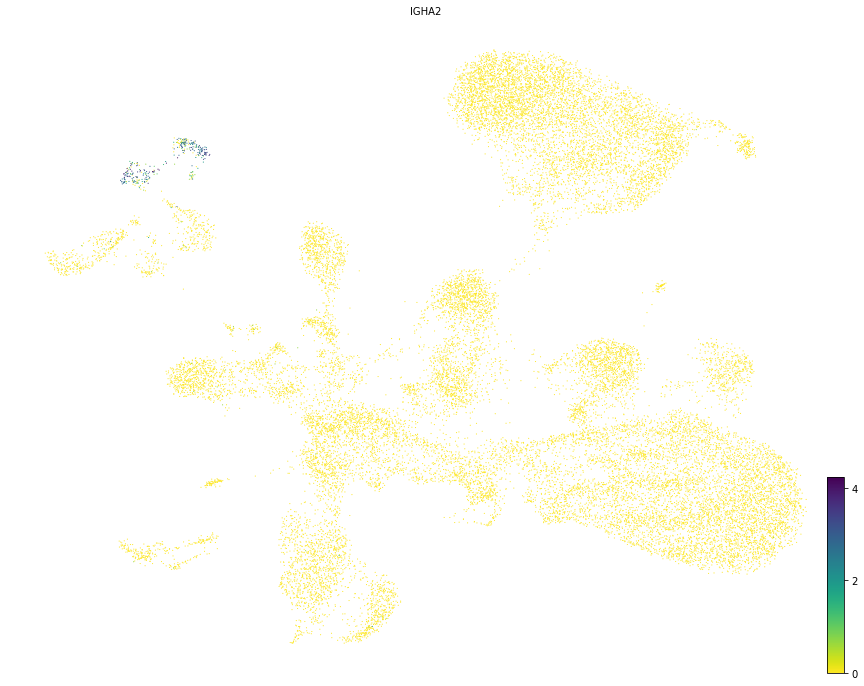

In [42]:
scv.pl.scatter(adata, color=['IGHA2'], figsize =(15,12), color_map='viridis_r')

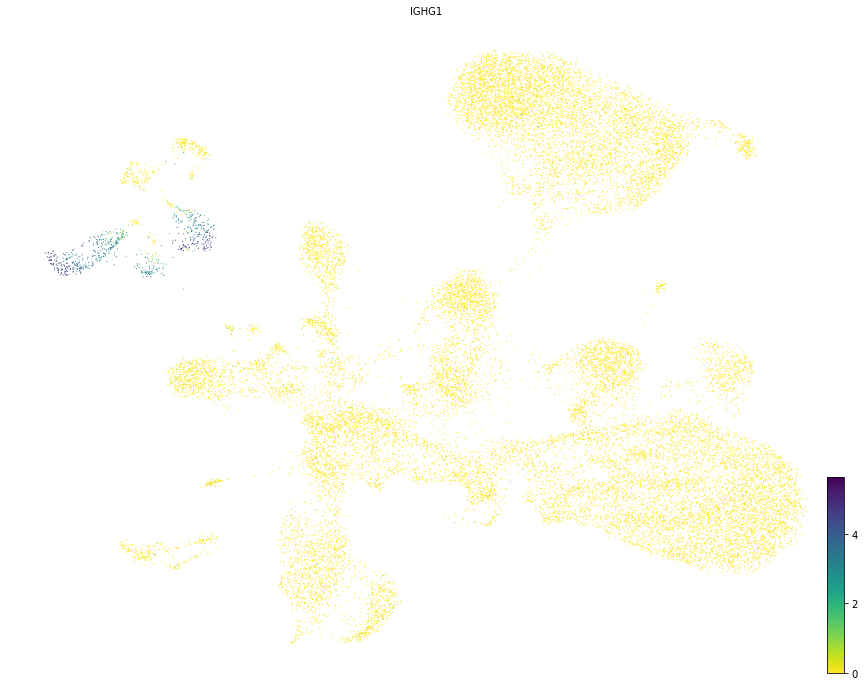

In [43]:
scv.pl.scatter(adata, color=['IGHG1'], figsize =(15,12), color_map='viridis_r')

In [ ]:
scv.pl.scatter(adata, color=['IGKC'], figsize =(15,12), color_map='viridis_r')

In [6]:
def exists(name,obj=None):
    if obj is None: return name in locals()
    else: return hasattr(obj,name)
    
if not exists('adata'):
    adata = scv.read( overclustered )

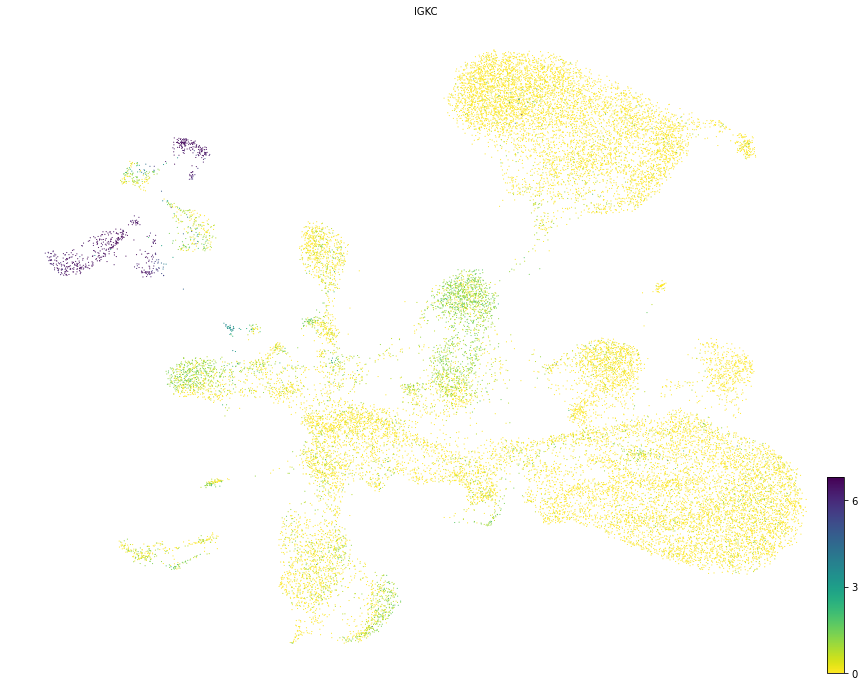

In [7]:
scv.pl.scatter(adata, color=['IGKC'], figsize =(15,12), color_map='viridis_r')

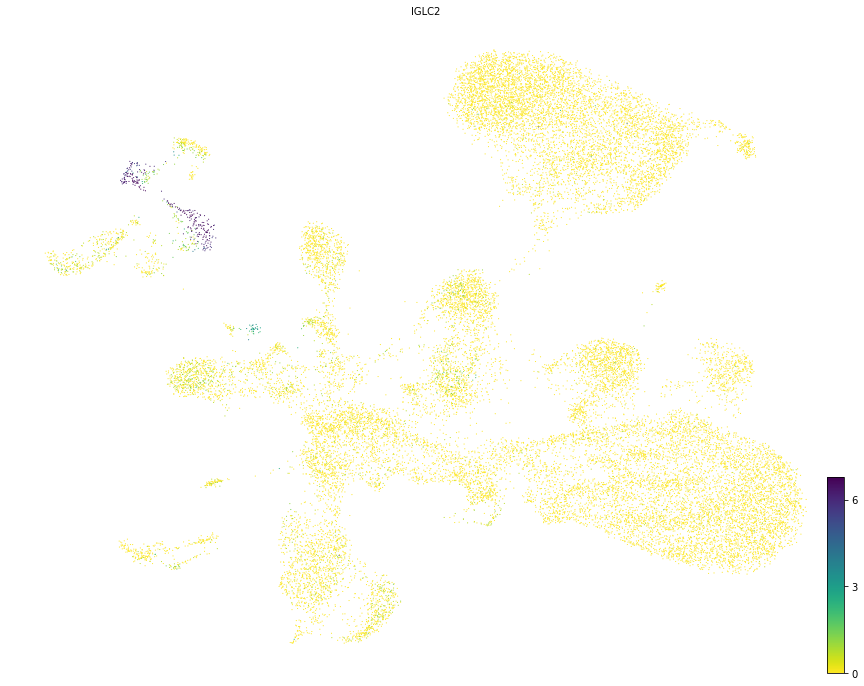

In [10]:
scv.pl.scatter(adata, color=['IGLC2'], figsize =(15,12), color_map='viridis_r')

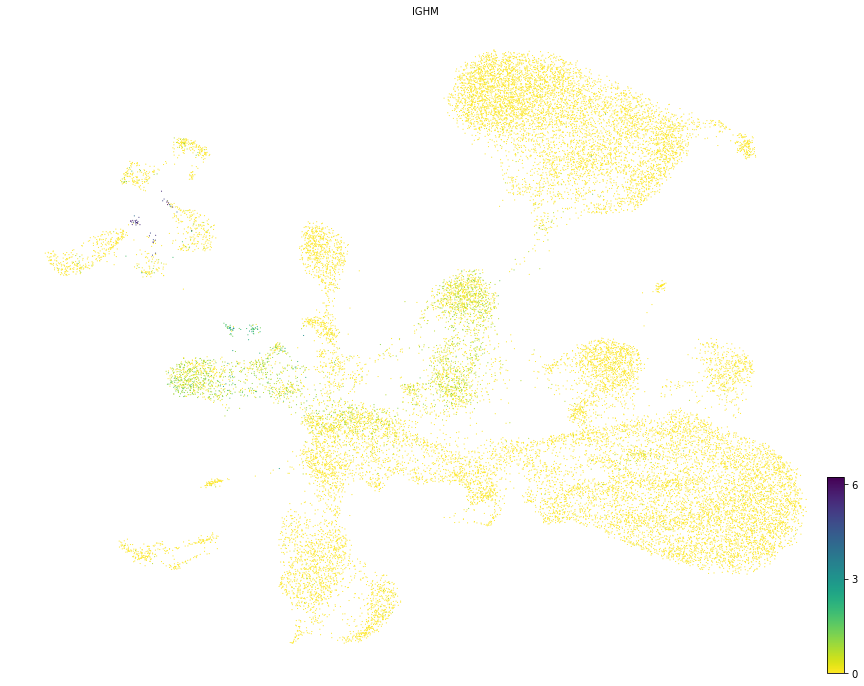

In [15]:
scv.pl.scatter(adata, color=['IGHM'], figsize =(15,12), color_map='viridis_r')

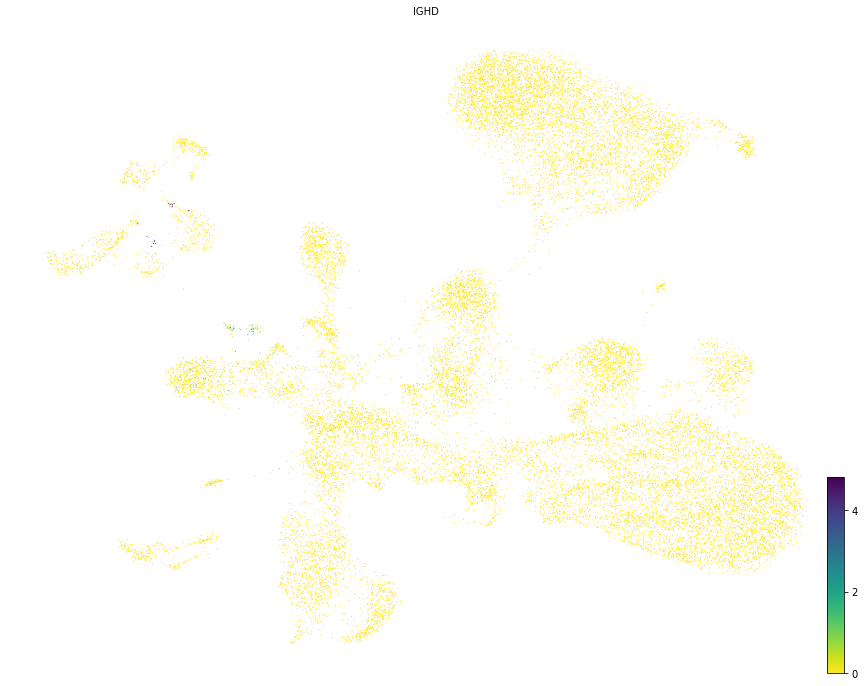

In [16]:
scv.pl.scatter(adata, color=['IGHD'], figsize =(15,12), color_map='viridis_r')

# Short explanation of the mature B cell idea:

I am surprised that the B cells cluster by both heavy chain usage (IGHA and IGHG)  as well as light chain usage (IGLC and IGKC).
If there is so much difference in these cells what are the differences?

# Short the eraly B/T cell development

I will refere to group IDs as in 'louvain11_merged.95_renamed'.
group 19 is the central group where both early B and T cells have a connection to. Hence I assume it is the CLP population.
Groups 2 and 32 seam to be early B cells (proB; heavy chain recombination) and group 1 are preB cells (light chain VDJ recombination).
They all express low level of IGHM. Even parts of group 7 express IGHM and link to the also IGHM expressing groups 0, 21 and 24. I do not know which cells these are.
The group 34 even expressed IGHD - a marker for immature B cells.

The interesting parts are (A) why are there T cells in the bone marrow (groups 11 and 17) and (B) is there really a connection between the proB group 32 and the T cell group 11?
That would be cool to see as some T cells are also harboring IgHM recombinations - failed ones. But proB should be already committed to B cell development.
So how do these cells manage to drop out of the B cell program?

A shame I do not have enough time to dig deeper.

# Do it yourself.

Hi Hongzhe,

I have added a folder on Aurora for you that contains all the overclustered (finaly) analysed file.
```
/projects/fs1/common/Hongzhe/Hongze_healthy_2020_10_downsampled_1000_2D_overclustered.h5ad
```
Copy this file to a folder you want to work in (on aurora), go to this folder (terminal)
and run
```
sbatch /projects/fs1/common/software/SingSingCell/1.0/runSbatch.sh
```
You get a jupyter notebook server that runs for 24h on one node.
You will get a message like 
```
Submitted batch job 746197
```
by running 
```
cat <the id you saw here 746197>
```
You get to know how to connect to the server:
```
[InstallKernelSpec] Removing existing kernelspec in /home/stefanl/.local/share/jupyter/kernels/ir
[InstallKernelSpec] Installed kernelspec ir in /home/stefanl/.local/share/jupyter/kernels/ir
[I 08:25:10.625 LabApp] JupyterLab extension loaded from /usr/local/lib/python3.8/dist-packages/jupyterlab
[I 08:25:10.625 LabApp] JupyterLab application directory is /usr/local/share/jupyter/lab
[I 08:25:10.627 LabApp] Serving notebooks from local directory: /projects/fs1/common/genome/lunarc/datasets/A_human_cell_atlas_of_fetal_gene_expression
[I 08:25:10.628 LabApp] Jupyter Notebook 6.1.4 is running at:
[I 08:25:10.628 LabApp] http://ls2-n3:9734/?token=1a83ddcf514656277436b6dd191d56b948cbb7a828e02cac
[I 08:25:10.628 LabApp]  or http://127.0.0.1:9734/?token=1a83ddcf514656277436b6dd191d56b948cbb7a828e02cac
[I 08:25:10.628 LabApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
```

There you riught click on the line like -> open link
```
[I 08:25:10.628 LabApp] http://ls2-n3:9734/?token=1a83ddcf514656277436b6dd191d56b948cbb7a828e02cac
```

In this jupyter labbook server you can plot after:


In [ ]:
import scvelo as scv
import loompy
import scanpy
import igraph
import phate
import glob, os
import pandas as pd
import os
import re
import subprocess
from collections import Counter
import numpy as np

#ofile = "Pavan_healthy_merged_downsampled_1000.h5ad"
#analyzed = "Hongze_healthy_2020_10_downsampled_1000.h5ad"
overclustered = "Hongze_healthy_2020_10_downsampled_1000_2D_overclustered.h5ad"

In [ ]:
adata = scv.read(overclustered)

In [ ]:
scv.pl.scatter(adata, color=['IGKC'], figsize =(15,12), color_map='viridis_r')

Hope you enjoy this experience. Feel free to try whatever you want!